In [13]:
import csv
import os

incomeData = []
folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
csv_file_path = os.path.join(folder_path, "usa.csv")
with open(csv_file_path, newline = '') as myFile:
    data = csv.reader(myFile)
    for row in data:
        #skip the header
        if row[6] != 'INCTOT':
            #Skip anyone who did not earn or had a negative income
            if int(row[6]) > 1:
                # skip NA
                if int(row[6]) != 9999999:
                    #Skip anyone under the age of 18
                    if int(row[1]) > 17:
                        incomeData.append(int(row[6]))

In [14]:
#Get a Sample
import random
sample = random.sample(incomeData, 100)
# print(sample)

sample.sort()
sampleSize = len(sample)

i = 1
sampleQuantiles = []
for row in sample:
    sampleQuantile = (i-0.5)/sampleSize
    i += 1
    sampleQuantiles.append(sampleQuantile)

print(len(sampleQuantiles))
print(sampleQuantiles)

100
[0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175, 0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265, 0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355, 0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445, 0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535, 0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625, 0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715, 0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805, 0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895, 0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985, 0.995]


In [15]:
## Load z-table
z_table = []
folder_path = r"C:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\1A - Statistics\Statistical_Causal_Inference_Analysis\data"
csv_file_path = os.path.join(folder_path, "z_table.csv")
with open(csv_file_path, newline='') as zTableFile:
    data = csv.reader(zTableFile)
    for row in data:
        z_table.append(row)

In [16]:
z_scores_from_normal_distribution = []
for row in sampleQuantiles:
    sample_quantile_probability = row
#     print(sample_quantile_probability)
    
    i = 0
    for each in z_table:
        i += 1
        z_table_probability = each[1]
        #values will not match exactly, so we need to find a close match
        if row <= float(each[1]):
            z_scores_from_normal_distribution.append(each[0])
            break

print(len(z_scores_from_normal_distribution))
print(z_scores_from_normal_distribution)

100
['-2.57', '-2.17', '-1.96', '-1.81', '-1.69', '-1.59', '-1.51', '-1.43', '-1.37', '-1.31', '-1.25', '-1.2', '-1.15', '-1.1', '-1.05', '-1.01', '-0.97', '-0.93', '-0.89', '-0.85', '-0.82', '-0.78', '-0.75', '-0.72', '-0.69', '-0.65', '-0.62', '-0.59', '-0.56', '-0.53', '-0.51', '-0.48', '-0.45', '-0.42', '-0.39', '-0.37', '-0.34', '-0.31', '-0.29', '-0.26', '-0.24', '-0.21', '-0.18', '-0.16', '-0.13', '-0.11', '-0.08', '-0.06', '-0.03', '-0.01', '0.02', '0.04', '0.07', '0.09', '0.12', '0.14', '0.17', '0.19', '0.22', '0.25', '0.27', '0.3', '0.32', '0.35', '0.38', '0.4', '0.43', '0.46', '0.49', '0.52', '0.54', '0.57', '0.6', '0.63', '0.66', '0.7', '0.73', '0.76', '0.79', '0.83', '0.86', '0.9', '0.94', '0.98', '1.02', '1.06', '1.11', '1.16', '1.21', '1.26', '1.32', '1.38', '1.44', '1.52', '1.6', '1.7', '1.82', '1.96', '2.17', '2.58']


In [17]:
##Function for Mean
def getMean(sampleList):
    sampleSize = len(sampleList)
    totalSumIncome = 0
    for row in sampleList:
        totalSumIncome = row + totalSumIncome 
        mean = totalSumIncome / sampleSize
    return mean

## 
def getSampleSD(sampleList, mean):
    sumOfSquares = 0
    sampleSize = len(sampleList)
    for row in sampleList:
        deviationScore = row - mean
        sumOfSquares = deviationScore**2 + sumOfSquares
    
    variance = sumOfSquares/(sampleSize-1)
    SD = variance**0.5
    return SD

In [18]:
mean = getMean(sample)
print(mean)
SD = getSampleSD(sample, mean)
print(SD)

z_scores_actual = []
for row in sample:
    z_score = (row-mean)/SD
    z_scores_actual.append(z_score)
    
print(len(z_scores_actual))
# print(z_scores_actual)

51327.7
71692.31683127809
100


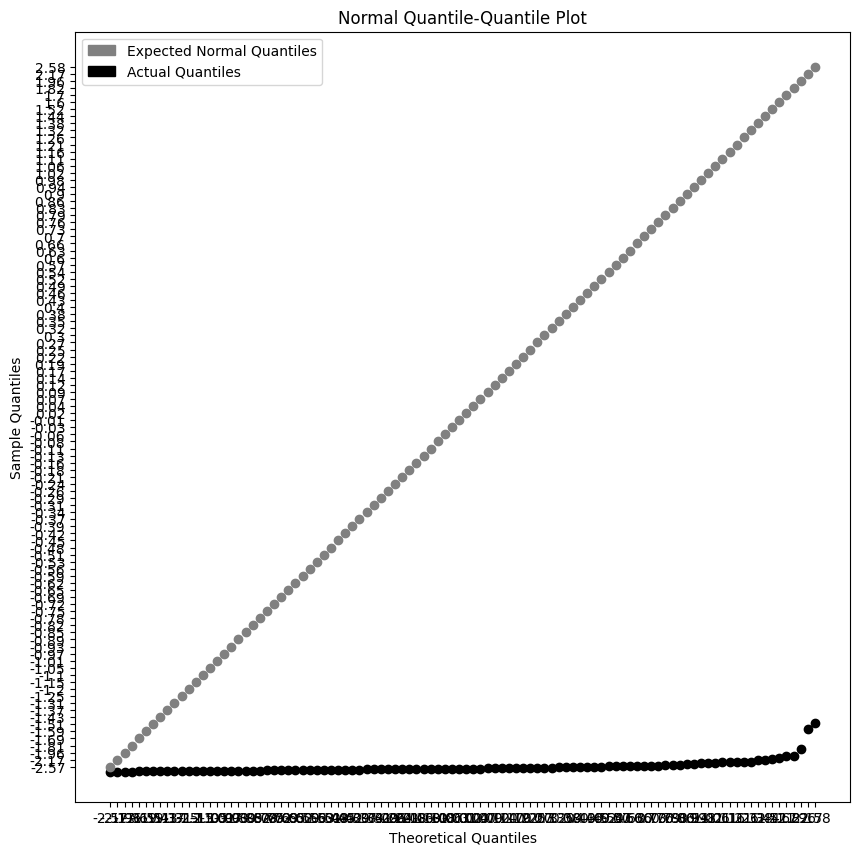

In [19]:
## plot
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

grey_patch = mpatches.Patch(color = 'grey', label = 'Expected Normal Quantiles')
black_patch = mpatches.Patch(color = 'black', label = 'Actual Quantiles')

plt.figure(figsize=(10,10))
plt.title('Normal Quantile-Quantile Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.legend(handles=[grey_patch, black_patch])

plt.scatter(z_scores_from_normal_distribution, z_scores_actual, color='black')
plt.scatter(z_scores_from_normal_distribution, z_scores_from_normal_distribution, color='grey')
plt.show()

<Axes: >

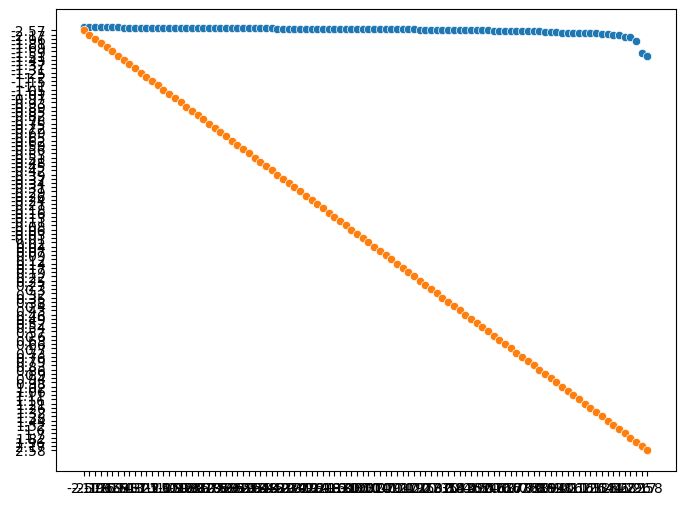

In [20]:
import seaborn as sns
# sns.set(style="whitegrid")
plt.figure(figsize = (8, 6))
sns.scatterplot(x=z_scores_from_normal_distribution, y=z_scores_actual)
sns.scatterplot(x=z_scores_from_normal_distribution, y=z_scores_from_normal_distribution)